In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('letterdata.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.shape

(20000, 17)

In [5]:
df.info

<bound method DataFrame.info of       letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yed

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


#### Seperate the input and output variables

In [7]:
#input data
x=df.drop('letter',axis=1)

#output data
y=df['letter']

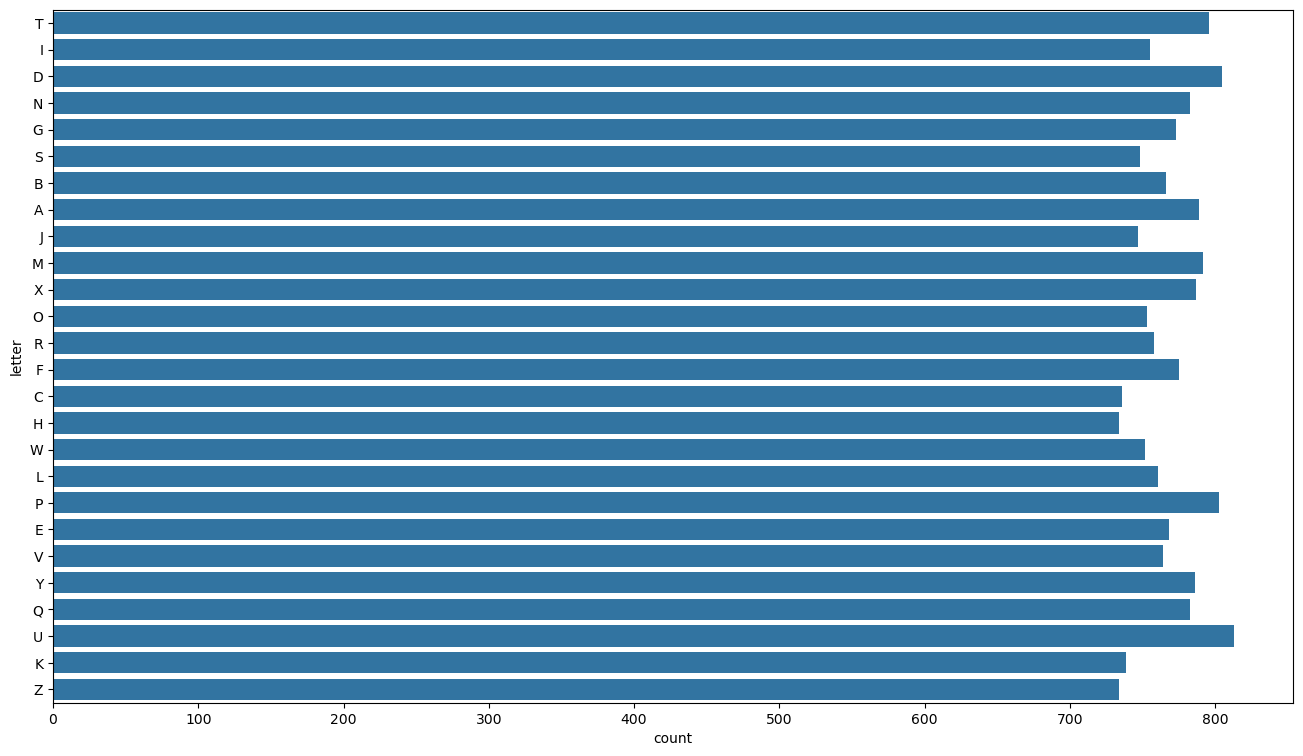

In [8]:
plt.figure(figsize=(16,9))
sns.countplot(y=y);

#### Cross validation

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test,y_train, y_test = train_test_split(x, y , random_state=0)

In [11]:
x_train.shape, x_test.shape

((15000, 16), (5000, 16))

In [13]:
from sklearn.svm import SVC

In [14]:
svm=SVC()

In [15]:
svm.fit(x_train,y_train)

SVC()

In [16]:
y_pred = svm.predict(x_test)

In [17]:
y_pred

array(['Y', 'B', 'K', ..., 'V', 'U', 'M'], dtype=object)

In [18]:
# Performance Evaluation

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

In [19]:
print(accuracy_score(y_test, y_pred))

0.9278


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.96      0.97      0.96       180
           B       0.88      0.92      0.90       206
           C       0.96      0.92      0.94       196
           D       0.86      0.96      0.90       212
           E       0.87      0.87      0.87       186
           F       0.90      0.94      0.92       201
           G       0.84      0.89      0.87       221
           H       0.90      0.85      0.88       156
           I       0.98      0.92      0.95       181
           J       0.97      0.91      0.94       196
           K       0.92      0.91      0.92       174
           L       0.97      0.93      0.95       189
           M       0.95      0.94      0.95       210
           N       0.95      0.96      0.96       171
           O       0.91      0.92      0.91       191
           P       0.98      0.87      0.92       208
           Q       0.92      0.96      0.94       175
           R       0.81    

In [21]:
print(confusion_matrix(y_test, y_pred))

[[174   0   0   3   0   0   1   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   1   0]
 [  2 189   0   2   1   0   0   0   0   0   0   0   0   0   0   0   0   8
    4   0   0   0   0   0   0   0]
 [  0   0 180   0   5   0   6   0   0   0   2   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  2   2   0 203   0   0   0   1   0   0   0   0   0   1   0   1   0   2
    0   0   0   0   0   0   0   0]
 [  0   2   0   0 162   1   8   0   0   0   1   4   0   0   0   0   3   2
    0   0   0   0   0   0   0   3]
 [  0   1   0   1   1 188   2   1   0   0   0   0   0   1   0   1   0   0
    0   4   0   0   1   0   0   0]
 [  1   1   1   5   0   1 197   0   0   0   2   0   0   0   7   0   2   2
    0   0   0   2   0   0   0   0]
 [  0   2   1   6   0   0   1 133   0   0   2   0   0   0   0   0   1   8
    0   0   1   1   0   0   0   0]
 [  0   0   1   2   0   2   0   0 167   3   0   1   0   0   0   0   0   0
    4   0   0   0   0   0   0   1]
 [  0   0   0   3  

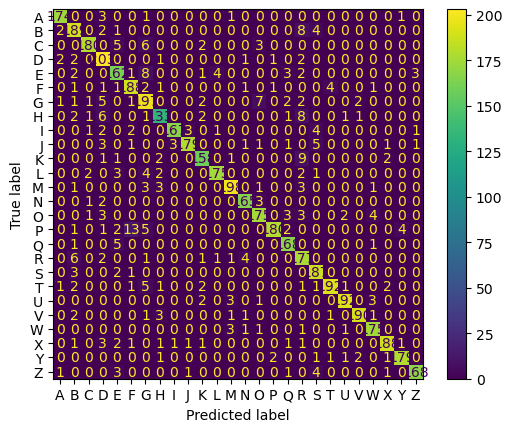

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [24]:
#with differnet kernals
sig=SVC(kernel='sigmoid')
sig.fit(x_train,y_train)
sig_pred = sig.predict(x_test)
print(accuracy_score(y_test, sig_pred))

0.0278


In [26]:
poly=SVC(kernel='poly')
poly.fit(x_train,y_train)
poly_pred = poly.predict(x_test)
print(accuracy_score(y_test, poly_pred))

0.9496


In [27]:
lr=SVC(kernel='linear')
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(accuracy_score(y_test, lr_pred))

0.861


In [28]:
new = pd.DataFrame(
    [[6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7],
      [5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7]], columns=x.columns)

In [29]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
1,5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7


In [30]:
y_pred1 = poly.predict(new)

In [31]:
y_pred1

array(['M', 'F'], dtype=object)

In [32]:
poly_pred=poly.predict(x_test)
poly_pred

array(['Y', 'B', 'K', ..., 'V', 'U', 'M'], dtype=object)

In [33]:
print(accuracy_score(y_test, poly_pred))

0.9496


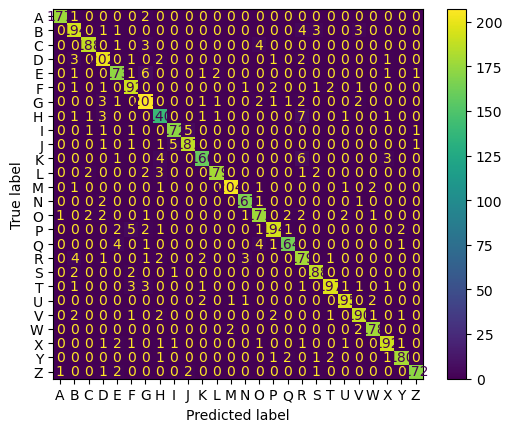

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, poly_pred)